# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5.1-atp_diff-ohe_player.ipynb), we saw that Decision Tree is still the best algorithm when we used the data set where we used player diff stats but we one hot encoded player id

In this notebook, we will run the same algorithms but we will one hot encode all categorical data - ie, tournament id, surface

### Results from Decision Tree Classifier with player diff dataset:

```
Model Score: 0.924307900067522

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.92      7416
         Win       0.93      0.92      0.92      7394

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```

# Summary of Results


Decision Tree seems to perform around the same without the player 1 and player 2 ID's. Considering the improvement in training speed. This might be a good dataset to start with

```
Model Score: 0.924375422012154

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7453
         Win       0.93      0.92      0.92      7357

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```


* No improvements for Adaboost
* Logistic Regression, Grandient Boosting and Random Forest did worse with OHE categorical features
* Significant improvement for KNN



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe_noplayer"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe.csv'

START_YEAR = 1998
END_YEAR = 2018

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Let's remove one hot encoded player columns

In [3]:
import re

player_columns = [col for col in X_train.columns if re.match(r'(p1|p2)_[\d]+$', col)]
print(f'Before: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')
X_train = X_train.drop(player_columns, axis=1)
X_test = X_test.drop(player_columns, axis=1)

print(f'After: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')

Before: X_train.shape (44429, 5251) X_test.shape (14810, 5251)
After: X_train.shape (44429, 429) X_test.shape (14810, 429)


In [4]:
[col for col in X_train.columns if re.match(r'(p1|p2).+', col)]

['p1_hand_l',
 'p1_hand_r',
 'p1_hand_u',
 'p2_hand_l',
 'p2_hand_r',
 'p2_hand_u',
 'p1_ioc_alg',
 'p1_ioc_arg',
 'p1_ioc_arm',
 'p1_ioc_aus',
 'p1_ioc_aut',
 'p1_ioc_aze',
 'p1_ioc_bah',
 'p1_ioc_bar',
 'p1_ioc_bel',
 'p1_ioc_ben',
 'p1_ioc_ber',
 'p1_ioc_bih',
 'p1_ioc_blr',
 'p1_ioc_bol',
 'p1_ioc_bra',
 'p1_ioc_bul',
 'p1_ioc_can',
 'p1_ioc_chi',
 'p1_ioc_chn',
 'p1_ioc_civ',
 'p1_ioc_col',
 'p1_ioc_crc',
 'p1_ioc_cro',
 'p1_ioc_cub',
 'p1_ioc_cyp',
 'p1_ioc_cze',
 'p1_ioc_den',
 'p1_ioc_dom',
 'p1_ioc_ecu',
 'p1_ioc_egy',
 'p1_ioc_esa',
 'p1_ioc_esp',
 'p1_ioc_est',
 'p1_ioc_fin',
 'p1_ioc_fra',
 'p1_ioc_gbr',
 'p1_ioc_geo',
 'p1_ioc_ger',
 'p1_ioc_gre',
 'p1_ioc_hai',
 'p1_ioc_hkg',
 'p1_ioc_hun',
 'p1_ioc_ina',
 'p1_ioc_ind',
 'p1_ioc_iri',
 'p1_ioc_irl',
 'p1_ioc_isr',
 'p1_ioc_ita',
 'p1_ioc_jam',
 'p1_ioc_jpn',
 'p1_ioc_kaz',
 'p1_ioc_ken',
 'p1_ioc_kor',
 'p1_ioc_kuw',
 'p1_ioc_lat',
 'p1_ioc_ltu',
 'p1_ioc_lux',
 'p1_ioc_mar',
 'p1_ioc_mas',
 'p1_ioc_mda',
 'p1_ioc_mex',
 

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6763673193787981

              precision    recall  f1-score   support

        Loss       0.69      0.66      0.67      7453
         Win       0.67      0.70      0.68      7357

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810

      Loss   Win
Loss  4885  2568
Win   2225  5132


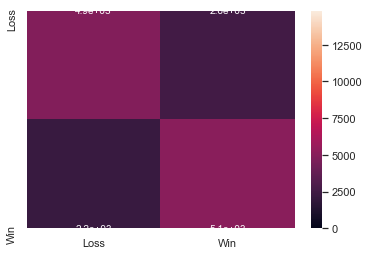

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.8397029034436192

              precision    recall  f1-score   support

        Loss       0.83      0.85      0.84      7453
         Win       0.85      0.83      0.84      7357

    accuracy                           0.84     14810
   macro avg       0.84      0.84      0.84     14810
weighted avg       0.84      0.84      0.84     14810

      Loss   Win
Loss  6348  1105
Win   1269  6088


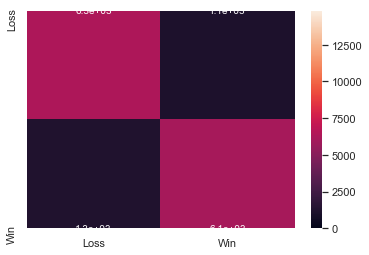

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.924375422012154

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7453
         Win       0.93      0.92      0.92      7357

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810

      Loss   Win
Loss  6911   542
Win    578  6779


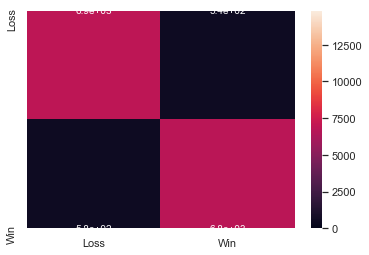

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.8164753544902094

              precision    recall  f1-score   support

        Loss       0.80      0.85      0.82      7453
         Win       0.84      0.78      0.81      7357

    accuracy                           0.82     14810
   macro avg       0.82      0.82      0.82     14810
weighted avg       0.82      0.82      0.82     14810

      Loss   Win
Loss  6339  1114
Win   1604  5753


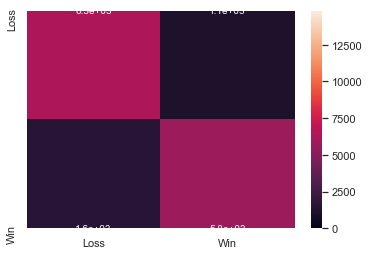

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3157            1.06m
         2           1.2579            1.01m
         3           1.2102           58.89s
         4           1.1722           57.53s
         5           1.1405           56.82s
         6           1.1058           56.81s
         7           1.0785           55.90s
         8           1.0558           55.26s
         9           1.0321           54.96s
        10           1.0159           54.52s
        20           0.8899           48.53s
        30           0.8228           41.59s
        40           0.7862           34.76s
        50           0.7572           28.57s
        60           0.7374           22.89s
        70           0.7194           17.07s
        80           0.6948           11.52s
        90           0.6686            5.79s
       100           0.6506            0.00s


Model Score: 0.8623902768399729

              precision    recall  f1-score   support

        Loss       0.85      0.88      0.87      7453
         Win       0.88      0.84      0.86      7357

    accuracy                           0.86     14810
   macro avg       0.86      0.86      0.86     14810
weighted avg       0.86      0.86      0.86     14810

      Loss   Win
Loss  6572   881
Win   1157  6200


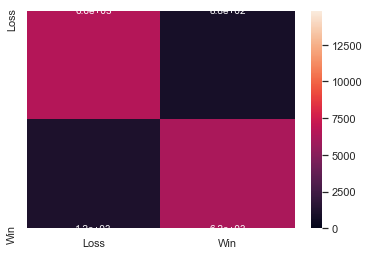

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7536124240378123

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.76      7453
         Win       0.77      0.72      0.74      7357

    accuracy                           0.75     14810
   macro avg       0.75      0.75      0.75     14810
weighted avg       0.75      0.75      0.75     14810

      Loss   Win
Loss  5888  1565
Win   2084  5273


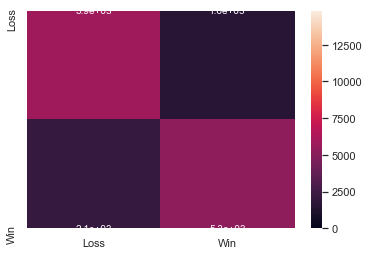

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Results

* Decision Tree is still our best model
* no significant improvement for Adaboost
* We did see significant improvement for KNN when we used this dataset
* Gradient Boosting, Logistic Regression, Random Forest all did worse with this dataset

In [29]:
report = pd.read_csv(ab.report_file)
report.tail(5)

,accuracy,classification_report,confusion_matrix,data_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,start_year,total_time_min
37,0.839703,"{""Loss"": {""precision"": 0.8333989759747932, ""re...","{""0"": {""0"": 6348, ""1"": 1269}, ""1"": {""0"": 1105,...",../datasets/atp_matches_1985-2019_features-dif...,diff-ohe_noplayer,2018,0.0,../models/kneighborsclassifier-1998-2018-diff-...,KNeighborsClassifier,0.0,1998,0.0
38,0.924375,"{""Loss"": {""precision"": 0.9228201361997597, ""re...","{""0"": {""0"": 6911, ""1"": 578}, ""1"": {""0"": 542, ""...",../datasets/atp_matches_1985-2019_features-dif...,diff-ohe_noplayer,2018,0.0,../models/decisiontreeclassifier-1998-2018-dif...,DecisionTreeClassifier,0.0,1998,0.0
39,0.816475,"{""Loss"": {""precision"": 0.798061185949893, ""rec...","{""0"": {""0"": 6339, ""1"": 1604}, ""1"": {""0"": 1114,...",../datasets/atp_matches_1985-2019_features-dif...,diff-ohe_noplayer,2018,0.0,../models/randomforestclassifier-1998-2018-dif...,RandomForestClassifier,0.0,1998,0.0
40,0.862390,"{""Loss"": {""precision"": 0.850304049683012, ""rec...","{""0"": {""0"": 6572, ""1"": 1157}, ""1"": {""0"": 881, ...",../datasets/atp_matches_1985-2019_features-dif...,diff-ohe_noplayer,2018,0.0,../models/gradientboostingclassifier-1998-2018...,GradientBoostingClassifier,0.0,1998,0.0
41,0.753612,"{""Loss"": {""precision"": 0.738585047666834, ""rec...","{""0"": {""0"": 5888, ""1"": 2084}, ""1"": {""0"": 1565,...",../datasets/atp_matches_1985-2019_features-dif...,diff-ohe_noplayer,2018,0.0,../models/adaboostclassifier-1998-2018-diff-oh...,AdaBoostClassifier,0.0,1998,0.0


Text(0.5, 1.0, 'Model Accuracy')

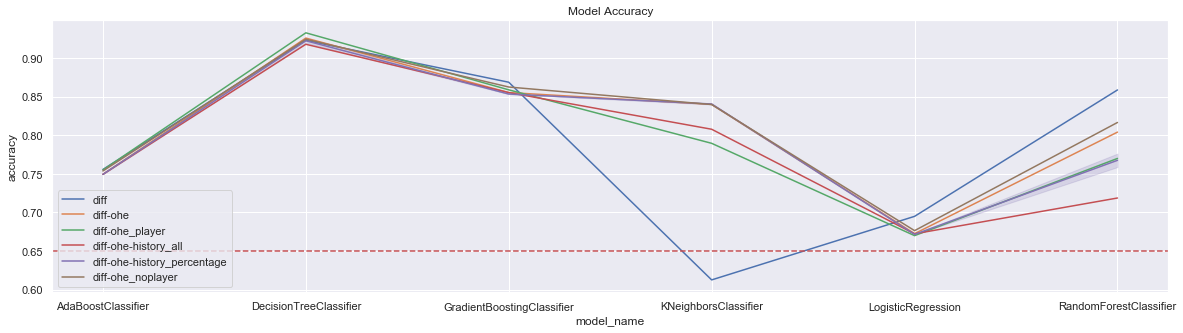

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 5))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")

In [31]:
report = pd.read_csv(ModelWrapper.report_file)

In [32]:
current_report = report[(report.model_name == 'DecisionTreeClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

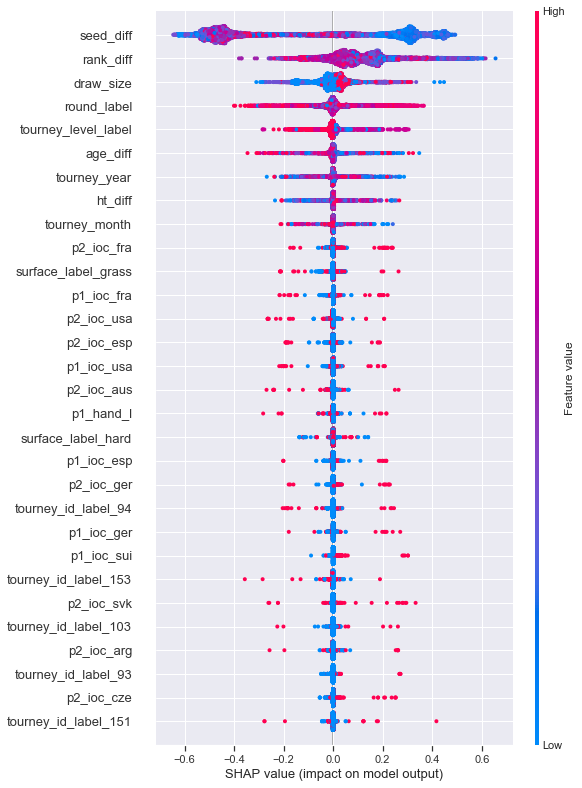

In [34]:
shap.summary_plot(shap_values[1], X_test, max_display=30)